<a href="https://colab.research.google.com/github/Preksha-Dadoo/UppercaseRace/blob/main/TextFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install **compilers**

In [14]:
#to install necesssary compilers
!apt update
!apt install gcc g++ openjdk-11-jdk r-base -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
22 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

# Generate Large Text Files

In [3]:
import os
import random
import string

def generate_text_file(filename, size_mb):
    size_bytes = size_mb * 1024 * 1024
    chars = string.ascii_lowercase + " \n"
    with open(filename, "w") as f:
        while os.path.getsize(filename) < size_bytes:
            f.write(''.join(random.choices(chars, k=100)) + '\n')

# Generate files
for size in [200, 400, 600, 800, 1000]:
    generate_text_file(f"text_{size}MB.txt", size)

print("Text files generated successfully!")

Text files generated successfully!


# C **PROGRAM**

In [4]:
%%writefile uppercase.c
#include <stdio.h>
#include <ctype.h>

int main(int argc, char *argv[]) {
    if (argc != 3) {
        printf("Usage: %s input_file output_file\n", argv[0]);
        return 1;
    }

    FILE *input = fopen(argv[1], "r");
    FILE *output = fopen(argv[2], "w");

    if (!input || !output) {
        printf("File error!\n");
        return 1;
    }

    int ch;
    while ((ch = fgetc(input)) != EOF) {
        fputc(toupper(ch), output);
    }

    fclose(input);
    fclose(output);
 return 0;
}


Writing uppercase.c


In [5]:
!gcc uppercase.c -o uppercase

# C++ PROGRAM **bold text**

In [6]:
%%writefile uppercase.cpp
#include <iostream>
#include <fstream>
#include <cctype>

int main(int argc, char *argv[]) {
    if (argc != 3) {
        std::cerr << "Usage: " << argv[0] << " input_file output_file\n";
        return 1;
    }

    std::ifstream input(argv[1]);
    std::ofstream output(argv[2]);

    if (!input || !output) {
        std::cerr << "File error!\n";
        return 1;
    }

    char ch;
    while (input.get(ch)) {
        output.put(std::toupper(ch));
    }

    return 0;
}

Writing uppercase.cpp


In [7]:
!g++ uppercase.cpp -o uppercase_cpp

uppercase.cpp:24:1: error: extended character   is not valid in an identifier
   24 |     return 0;
      | ^
uppercase.cpp:24:1: error: extended character   is not valid in an identifier
uppercase.cpp:24:1: error: extended character   is not valid in an identifier
uppercase.cpp:24:1: error: extended character   is not valid in an identifier
uppercase.cpp:24:1: error: extended character   is not valid in an identifier
uppercase.cpp: In function ‘int main(int, char**)’:
uppercase.cpp:24:1: error: ‘    return 0’ was not declared in this scope
   24 |     return 0;
      | ^~~~~~~~~~~~


# JAVA **PROGRAM**

In [8]:
%%writefile Uppercase.java
import java.io.*;

public class Uppercase {
    public static void main(String[] args) throws IOException {
        if (args.length != 2) {
            System.out.println("Usage: java Uppercase input_file output_file");
            return;
        }

        BufferedReader reader = new BufferedReader(new FileReader(args[0]));
        BufferedWriter writer = new BufferedWriter(new FileWriter(args[1]));

        int ch;
        while ((ch = reader.read()) != -1) {
            writer.write(Character.toUpperCase(ch));
        }

        reader.close();
        writer.close();
    }
}

Writing Uppercase.java


In [9]:
!javac Uppercase.java

Uppercase.java:20: error: illegal character: '\u00a0'
    }
^
Uppercase.java:20: error: illegal character: '\u00a0'
    }
 ^
Uppercase.java:20: error: illegal character: '\u00a0'
    }
  ^
Uppercase.java:20: error: illegal character: '\u00a0'
    }
   ^
4 errors


# R **PROGRAM**

In [10]:
%%writefile uppercase.R
args <- commandArgs(trailingOnly=TRUE)
if (length(args) != 2) {
  stop("Usage: Rscript uppercase.R input_file output_file")
}

input_file <- args[1]
output_file <- args[2]

text <- readLines(input_file, warn=FALSE)
text_upper <- toupper(text)
writeLines(text_upper, output_file)

Writing uppercase.R


# PYTHON **PROGRAM**

In [11]:
%%writefile uppercase.py
import sys

if len(sys.argv) != 3:
    print("Usage: python uppercase.py input_file output_file")
    sys.exit(1)

input_file, output_file = sys.argv[1], sys.argv[2]

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        outfile.write(line.upper())

Writing uppercase.py


In [12]:
import time
import subprocess

languages = {
    "C": "./uppercase",
    "C++": "./uppercase_cpp",
    "Java": "java Uppercase",
    "R": "Rscript uppercase.R",
    "Python": "python3 uppercase.py"
}

file_sizes = [200, 400, 600, 800, 1000]
results = {}

for lang, command in languages.items():
    times = []
    for size in file_sizes:
        input_file = f"text_{size}MB.txt"
        output_file = f"output_{lang.lower()}.txt"

        start = time.time()
        subprocess.run(f"{command} {input_file} {output_file}", shell=True)
        end = time.time()

        times.append(end - start)
    results[lang] = times

# Print results
for lang, times in results.items():
    print(f"{lang}: {times}")

C: [4.428628206253052, 5.627104043960571, 12.071990728378296, 13.444430112838745, 13.065125942230225]
C++: [0.003315448760986328, 0.002854585647583008, 0.0027625560760498047, 0.0014700889587402344, 0.0029654502868652344]
Java: [0.14105844497680664, 0.13226795196533203, 0.1380326747894287, 0.11367630958557129, 0.11819815635681152]
R: [60.73535871505737, 141.3159589767456, 205.41508650779724, 336.0612463951111, 446.74318289756775]
Python: [5.118396520614624, 6.275243759155273, 12.654934883117676, 15.242119550704956, 18.06221079826355]


In [15]:
import pandas as pd
df = pd.DataFrame(results)

# Display DataFrame
df

,C,C++,Java,R,Python
0,4.428628,0.003315,0.141058,60.735359,5.118397
1,5.627104,0.002855,0.132268,141.315959,6.275244
2,12.071991,0.002763,0.138033,205.415087,12.654935
3,13.444430,0.001470,0.113676,336.061246,15.242120
4,13.065126,0.002965,0.118198,446.743183,18.062211


In [16]:
df.to_csv("output.csv")

# ***Ploting ***

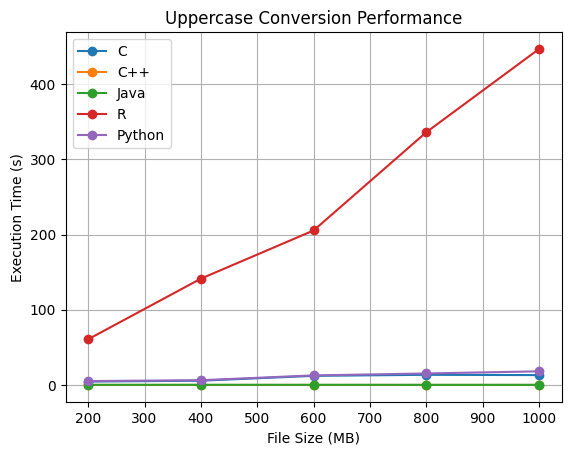

In [13]:
import matplotlib.pyplot as plt

for lang, times in results.items():
    plt.plot(file_sizes, times, marker="o", label=lang)

plt.xlabel("File Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Uppercase Conversion Performance")
plt.legend()
plt.grid()
plt.show()